In [2]:
import networkx as nx
import pickle

import numpy as np; np.set_printoptions(suppress=True, linewidth=180); np.seterr(divide='ignore')
import pandas as pd; pd.set_option('display.width', 500)
import matplotlib.pyplot as plt

from plot_module import plot_ode_results, plot_sde_results, plot_simulator_graph, plot_neuron_graph_subset, plot_twocomponent_results
from sim_param_from_network import names_from_network, sde_param_from_network, ode_from_network, start_state_from_nodes
from neuron_graph_process import neuron_graph_process
from neuron_graph_helper import load_pickled_neuron_graph
from analyse_simulation import two_component_statistics

from simulate import simulate_ode, simulate_gillespie, simulate_tauleaping

In [123]:
model = 'model_0'

In [124]:
G = load_pickled_neuron_graph(f'neuron_graphs/{model}.pkl')

In [125]:
DELTA = 0.25
NSS = 210
for node, data in G.nodes(data = True):
    if data['nodetype'] == 1:
        data['delta'] = DELTA
    data['nss'] = NSS

VARS, NODES = names_from_network(G)
START_STATE = start_state_from_nodes(G, heteroplasmy=0.5, delta=DELTA)
print(START_STATE)
print(START_STATE[0]+DELTA*START_STATE[1])

# get the parameter values for which the simulations will be run
C_B_val = sequence = [round(i * 10**-decimals, 14) for decimals in range(2, 13) for i in range(10, 0, -1)]
C_B_val = [element for i, element in enumerate(C_B_val) if i % 10 == 0] # sparseify for testing
print(f"preparing to simulate {model} with the following parameters:")
print(C_B_val, '\n')

[168, 168, 168, 168]
210.0
preparing to simulate model_0 with the following parameters:
[0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09, 1e-10, 1e-11] 




<<<< STARTING SIMULATION WITH C_B = 0.1 >>>>

simulating using gillespie...




  0%|          | 0/60 [00:00<?, ?it/s]

  2%|▏         | 1/60 [00:01<01:34,  1.59s/it]

  5%|▌         | 3/60 [00:01<00:26,  2.12it/s]

 17%|█▋        | 10/60 [00:01<00:05,  8.94it/s]

 23%|██▎       | 14/60 [00:03<00:09,  5.03it/s]

 28%|██▊       | 17/60 [00:03<00:07,  6.09it/s]

 37%|███▋      | 22/60 [00:03<00:04,  9.34it/s]

 42%|████▏     | 25/60 [00:03<00:03,  9.91it/s]

 47%|████▋     | 28/60 [00:05<00:05,  5.41it/s]

 50%|█████     | 30/60 [00:05<00:04,  6.33it/s]

 58%|█████▊    | 35/60 [00:05<00:02,  9.50it/s]

 63%|██████▎   | 38/60 [00:06<00:03,  5.56it/s]

 67%|██████▋   | 40/60 [00:06<00:03,  6.12it/s]

 72%|███████▏  | 43/60 [00:06<00:02,  7.89it/s]

 78%|███████▊  | 47/60 [00:06<00:01, 10.40it/s]

 82%|████████▏ | 49/60 [00:07<00:01,  9.25it/s]

 85%|████████▌ | 51/60 [00:08<00:01,  5.27it/s]

 88%|████████▊ | 53/60 [00:08<00:01,  6.33it/s]

100%|██████████| 60/60 [00:08<00:00,  6.88it/s]



Copy number:
wilcox. test: greater p= 0.0
pooled t test: greater p= 0.0004
mk trend: increasing p= 0.0
kpss: non-stationary p= 0.01

Eff. pop. size:
wilcox. test: none p= 0.8834
pooled t test: none p= 0.7331
mk trend: no trend p= 0.6076
kpss: stationary p= 0.1

Heteroplasmy:
wilcox. test: greater p= 0.0
pooled t test: greater p= 0.0012
mk trend: increasing p= 0.0
kpss: non-stationary p= 0.01

          t  ps_mean  ps_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       0.0   640.00    0.00    400.00     0.00    0.5000   0.0000   0.0000   0.0000     0.0     160.00      0.00     160.00      0.00      160.0      0.00     160.00      0.00
100  4000.0  1579.78   19.82    399.96     0.16    0.9833   0.0165   0.9833   0.0167     0.0       3.28      3.26     786.92     13.25        3.4      3.37     786.18     13.23



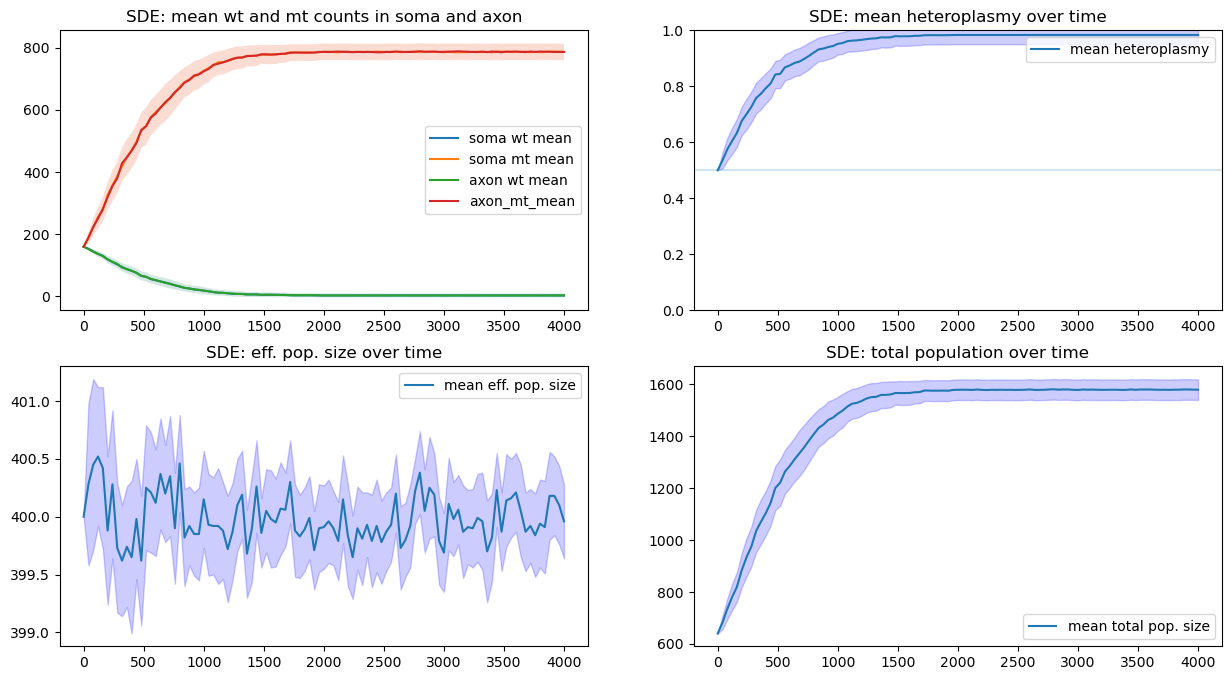

simulating using tau leaping...




  0%|          | 0/60 [00:00<?, ?it/s]

  2%|▏         | 1/60 [00:00<00:39,  1.50it/s]

  5%|▌         | 3/60 [00:00<00:13,  4.35it/s]

 22%|██▏       | 13/60 [00:01<00:04, 11.20it/s]

 27%|██▋       | 16/60 [00:01<00:03, 13.00it/s]

 40%|████      | 24/60 [00:01<00:01, 22.07it/s]

 47%|████▋     | 28/60 [00:02<00:02, 12.57it/s]

 60%|██████    | 36/60 [00:02<00:01, 19.23it/s]

 67%|██████▋   | 40/60 [00:03<00:01, 12.66it/s]

 77%|███████▋  | 46/60 [00:03<00:00, 16.93it/s]

 83%|████████▎ | 50/60 [00:03<00:00, 12.45it/s]

 92%|█████████▏| 55/60 [00:03<00:00, 16.06it/s]

100%|██████████| 60/60 [00:04<00:00, 14.56it/s]



Copy number:
wilcox. test: greater p= 0.0
pooled t test: greater p= 0.0037
mk trend: increasing p= 0.0
kpss: non-stationary p= 0.01

Eff. pop. size:
wilcox. test: none p= 0.7097
pooled t test: none p= 0.9839
mk trend: no trend p= 0.5632
kpss: stationary p= 0.1

Heteroplasmy:
wilcox. test: greater p= 0.0
pooled t test: greater p= 0.0102
mk trend: increasing p= 0.0
kpss: non-stationary p= 0.01

          t  ps_mean  ps_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       0.0   640.00    0.00    400.00     0.00    0.5000   0.0000   0.0000   0.0000     0.0     160.00      0.00     160.00      0.00     160.00      0.00      160.0      0.00
100  4000.0  1520.38   38.72    400.01     0.22    0.9333   0.0322   0.9333   0.0667     0.0      13.27      6.41     747.23     25.79      13.28      6.42      746.6     25.77



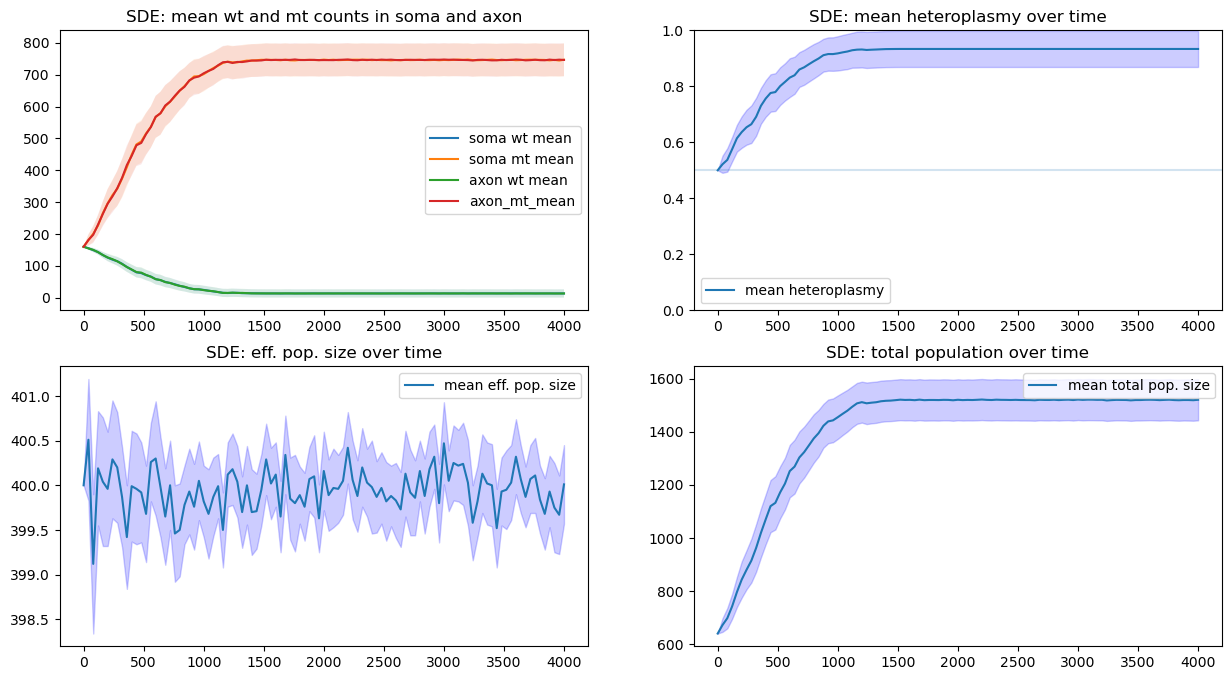


 ----- 


<<<< STARTING SIMULATION WITH C_B = 0.01 >>>>

simulating using gillespie...




  0%|          | 0/60 [00:00<?, ?it/s]

  2%|▏         | 1/60 [00:00<00:33,  1.78it/s]

  5%|▌         | 3/60 [00:01<00:31,  1.78it/s]

 10%|█         | 6/60 [00:01<00:12,  4.21it/s]

 22%|██▏       | 13/60 [00:02<00:05,  8.97it/s]

 25%|██▌       | 15/60 [00:03<00:08,  5.17it/s]

 28%|██▊       | 17/60 [00:03<00:08,  5.16it/s]

 33%|███▎      | 20/60 [00:03<00:05,  6.81it/s]

 42%|████▏     | 25/60 [00:03<00:03,  9.17it/s]

 45%|████▌     | 27/60 [00:04<00:03, 10.30it/s]

 48%|████▊     | 29/60 [00:05<00:05,  5.32it/s]

 52%|█████▏    | 31/60 [00:05<00:05,  5.46it/s]

 57%|█████▋    | 34/60 [00:05<00:03,  7.56it/s]

 60%|██████    | 36/60 [00:05<00:02,  8.04it/s]

 63%|██████▎   | 38/60 [00:05<00:02,  8.40it/s]

 67%|██████▋   | 40/60 [00:06<00:02,  9.90it/s]

 70%|███████   | 42/60 [00:06<00:02,  6.81it/s]

 73%|███████▎  | 44/60 [00:06<00:02,  6.35it/s]

 75%|███████▌  | 45/60 [00:07<00:02,  6.47it/s]

 78%|███████▊  | 47/60 [00:07<00:01,  7.42it/s]

 82%|████████▏ | 49/60 [00:07<


Copy number:
wilcox. test: greater p= 0.0
pooled t test: greater p= 0.0025
mk trend: increasing p= 0.0
kpss: non-stationary p= 0.01

Eff. pop. size:
wilcox. test: none p= 0.6751
pooled t test: none p= 0.6582
mk trend: no trend p= 0.6471
kpss: stationary p= 0.1

Heteroplasmy:
wilcox. test: greater p= 0.0
pooled t test: greater p= 0.0075
mk trend: increasing p= 0.0
kpss: non-stationary p= 0.01

          t  ps_mean  ps_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       0.0   640.00     0.0    400.00     0.00    0.5000   0.0000   0.0000   0.0000     0.0     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
100  4000.0  1460.47    49.7    400.28     0.55    0.8833   0.0414   0.8833   0.1167     0.0      23.22      8.25     709.33     33.32      23.67      8.41     704.25     33.09



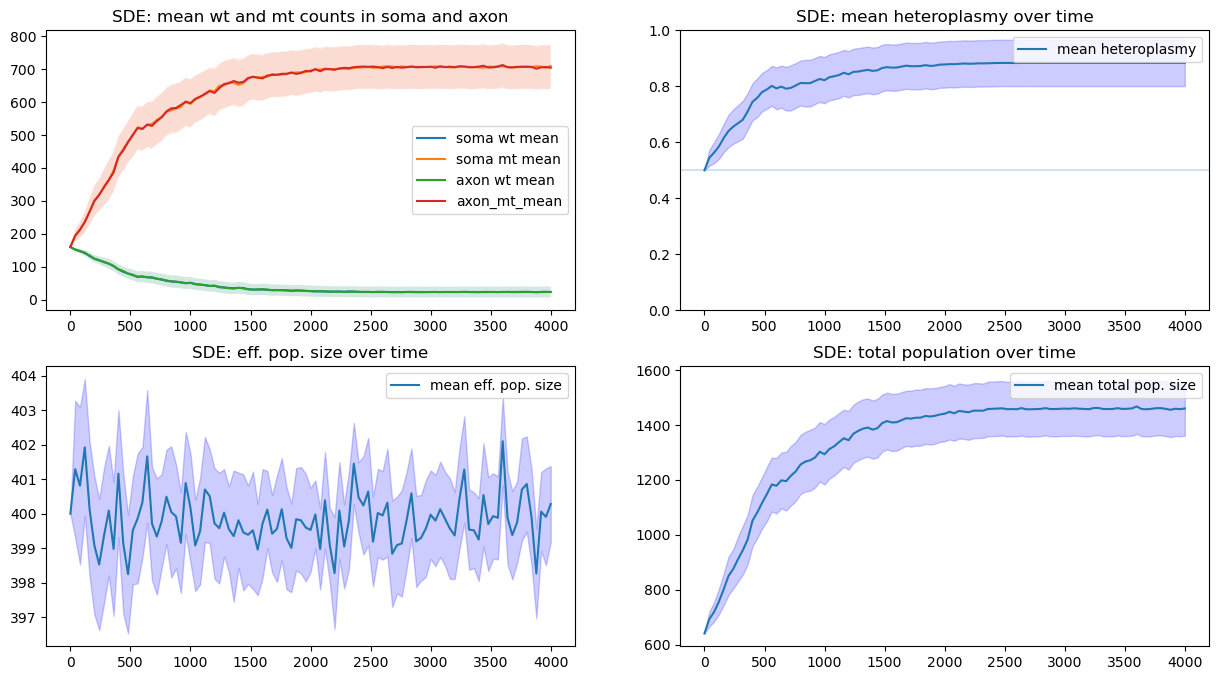

simulating using tau leaping...




  0%|          | 0/60 [00:00<?, ?it/s]

  2%|▏         | 1/60 [00:00<00:39,  1.49it/s]

  7%|▋         | 4/60 [00:00<00:09,  6.01it/s]

 22%|██▏       | 13/60 [00:01<00:03, 12.84it/s]

 25%|██▌       | 15/60 [00:01<00:03, 12.75it/s]

 28%|██▊       | 17/60 [00:01<00:03, 12.79it/s]

 42%|████▏     | 25/60 [00:02<00:02, 14.63it/s]

 45%|████▌     | 27/60 [00:02<00:02, 14.03it/s]

 48%|████▊     | 29/60 [00:02<00:02, 14.00it/s]

 60%|██████    | 36/60 [00:02<00:01, 22.58it/s]

 65%|██████▌   | 39/60 [00:03<00:01, 12.92it/s]

 70%|███████   | 42/60 [00:03<00:01, 14.53it/s]

 80%|████████  | 48/60 [00:03<00:00, 20.59it/s]

 87%|████████▋ | 52/60 [00:03<00:00, 13.34it/s]

100%|██████████| 60/60 [00:04<00:00, 14.72it/s]



Copy number:
wilcox. test: greater p= 0.0
pooled t test: greater p= 0.0024
mk trend: increasing p= 0.0
kpss: non-stationary p= 0.01

Eff. pop. size:
wilcox. test: none p= 0.7255
pooled t test: none p= 0.4592
mk trend: increasing p= 0.0265
kpss: non-stationary p= 0.0183

Heteroplasmy:
wilcox. test: greater p= 0.0
pooled t test: greater p= 0.0075
mk trend: increasing p= 0.0
kpss: non-stationary p= 0.01

          t  ps_mean  ps_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       0.0   640.00    0.00    400.00     0.00    0.5000   0.0000   0.0000   0.0000     0.0     160.00      0.00     160.00       0.0     160.00      0.00     160.00      0.00
100  4000.0  1460.62   49.64    400.47     0.64    0.8833   0.0414   0.8833   0.1167     0.0      23.65      8.41     704.57      33.1      23.43      8.33     708.97     33.32



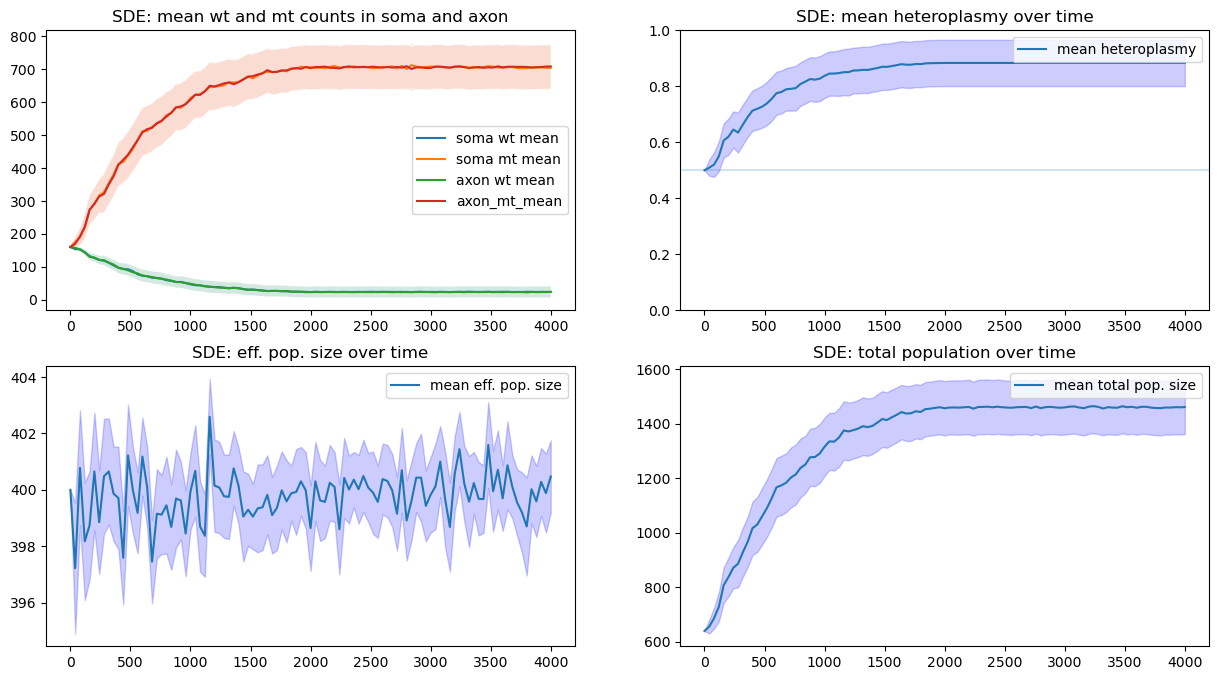


 ----- 


<<<< STARTING SIMULATION WITH C_B = 0.001 >>>>

simulating using gillespie...




  0%|          | 0/60 [00:00<?, ?it/s]

  2%|▏         | 1/60 [00:00<00:31,  1.86it/s]

  7%|▋         | 4/60 [00:01<00:13,  4.29it/s]

  8%|▊         | 5/60 [00:01<00:13,  4.21it/s]

 10%|█         | 6/60 [00:01<00:12,  4.16it/s]

 12%|█▏        | 7/60 [00:01<00:10,  4.86it/s]

 17%|█▋        | 10/60 [00:01<00:05,  8.66it/s]

 22%|██▏       | 13/60 [00:01<00:03, 12.36it/s]

 27%|██▋       | 16/60 [00:02<00:04, 10.70it/s]

 30%|███       | 18/60 [00:02<00:03, 12.06it/s]

 33%|███▎      | 20/60 [00:02<00:03, 11.42it/s]

 37%|███▋      | 22/60 [00:02<00:03,  9.70it/s]

 40%|████      | 24/60 [00:03<00:05,  6.26it/s]

 43%|████▎     | 26/60 [00:03<00:04,  7.20it/s]

 47%|████▋     | 28/60 [00:03<00:03,  8.54it/s]

 50%|█████     | 30/60 [00:03<00:03,  9.04it/s]

 53%|█████▎    | 32/60 [00:04<00:03,  8.98it/s]

 58%|█████▊    | 35/60 [00:04<00:02, 11.85it/s]

 62%|██████▏   | 37/60 [00:04<00:01, 11.87it/s]

 65%|██████▌   | 39/60 [00:04<00:02,  8.75it/s]

 68%|██████▊   | 41/60 [00:05<00


Copy number:
wilcox. test: greater p= 0.0
pooled t test: greater p= 0.0114
mk trend: increasing p= 0.0
kpss: non-stationary p= 0.01

Eff. pop. size:
wilcox. test: none p= 0.7217
pooled t test: none p= 0.4648
mk trend: no trend p= 0.0711
kpss: stationary p= 0.1

Heteroplasmy:
wilcox. test: greater p= 0.0132
pooled t test: none p= 0.0723
mk trend: increasing p= 0.0
kpss: non-stationary p= 0.01

          t  ps_mean  ps_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       0.0   640.00    0.00    400.00     0.00    0.5000   0.0000     0.00   0.0000     0.0     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
100  4000.0  1189.38   73.95    397.37     3.04    0.6635   0.0607     0.65   0.3333     0.0      66.62     11.91     527.75     48.74      66.75     12.02     528.27     48.97



  0%|          | 0/60 [20:45:44<?, ?it/s]


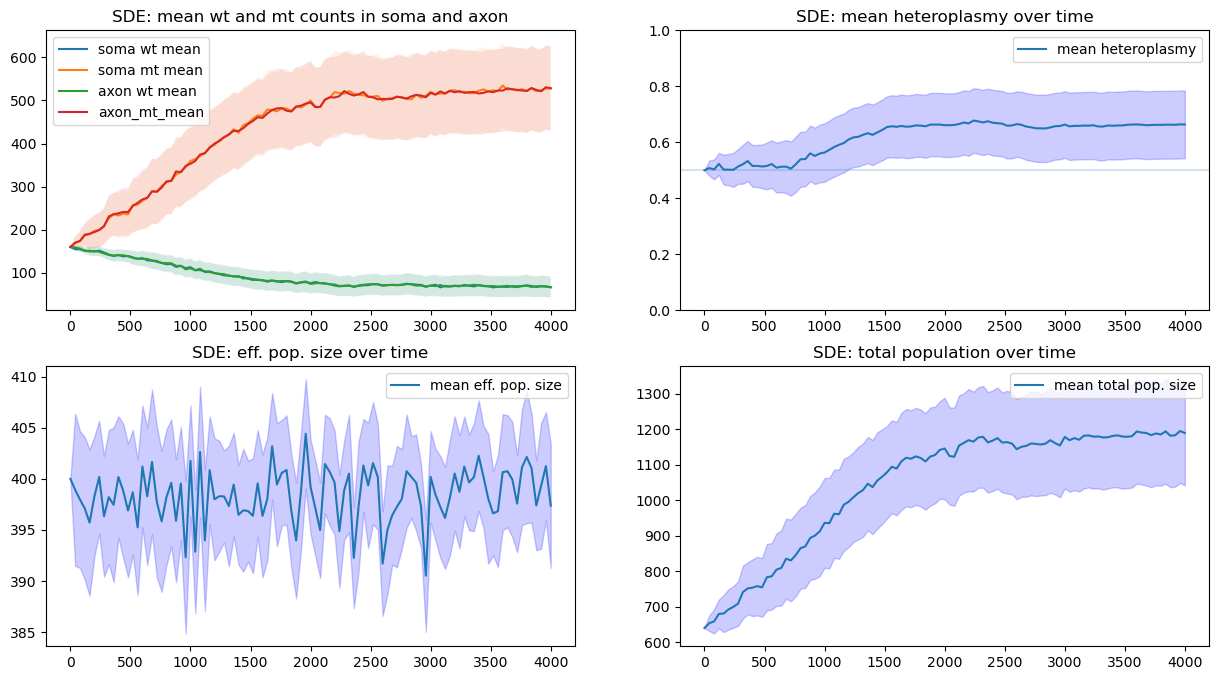

simulating using tau leaping...



100%|██████████| 60/60 [00:03<00:00, 15.79it/s]



Copy number:
wilcox. test: greater p= 0.0
pooled t test: greater p= 0.0098
mk trend: increasing p= 0.0
kpss: non-stationary p= 0.01

Eff. pop. size:
wilcox. test: none p= 0.2157
pooled t test: none p= 0.4802
mk trend: no trend p= 0.5672
kpss: stationary p= 0.1

Heteroplasmy:
wilcox. test: none p= 0.2878
pooled t test: none p= 0.1366
mk trend: increasing p= 0.0
kpss: non-stationary p= 0.01

          t  ps_mean  ps_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       0.0   640.00     0.0    400.00     0.00    0.5000   0.0000     0.00   0.0000     0.0     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
100  4000.0  1074.35    76.1    395.22     2.77    0.5769   0.0631     0.55   0.4167     0.0      84.33     12.25     455.72     50.55      84.52     12.37     449.78     50.03



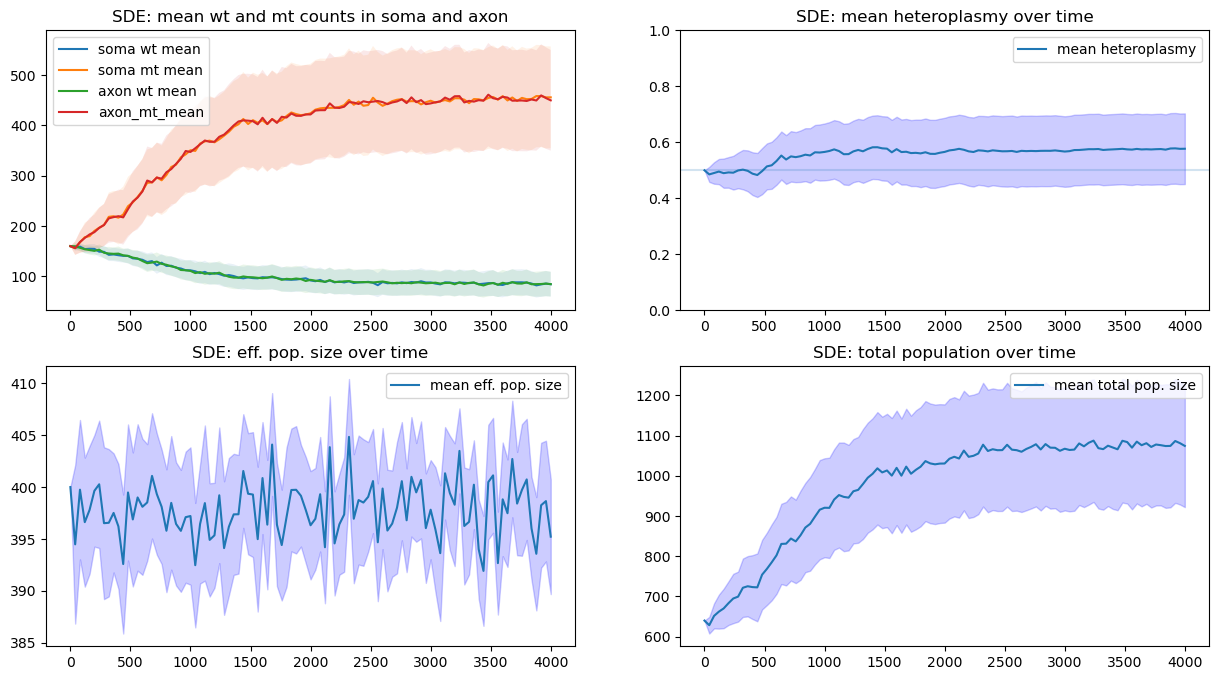


 ----- 


<<<< STARTING SIMULATION WITH C_B = 0.0001 >>>>

simulating using gillespie...



100%|██████████| 60/60 [00:05<00:00, 10.01it/s]



Copy number:
wilcox. test: greater p= 0.002
pooled t test: none p= 0.104
mk trend: increasing p= 0.0
kpss: non-stationary p= 0.01

Eff. pop. size:
wilcox. test: less p= 0.0194
pooled t test: none p= 0.2458
mk trend: increasing p= 0.0175
kpss: stationary p= 0.0873

Heteroplasmy:
wilcox. test: none p= 0.7963
pooled t test: none p= 0.8259
mk trend: decreasing p= 0.0
kpss: non-stationary p= 0.01

          t  ps_mean  ps_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       0.0   640.00    0.00    400.00     0.00    0.5000   0.0000   0.0000   0.0000     0.0     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
100  4000.0   948.17   80.32    377.62     9.72    0.4833   0.0645   0.4833   0.5167     0.0      94.55     12.68     381.88     51.73      92.88     12.36     378.85     51.23



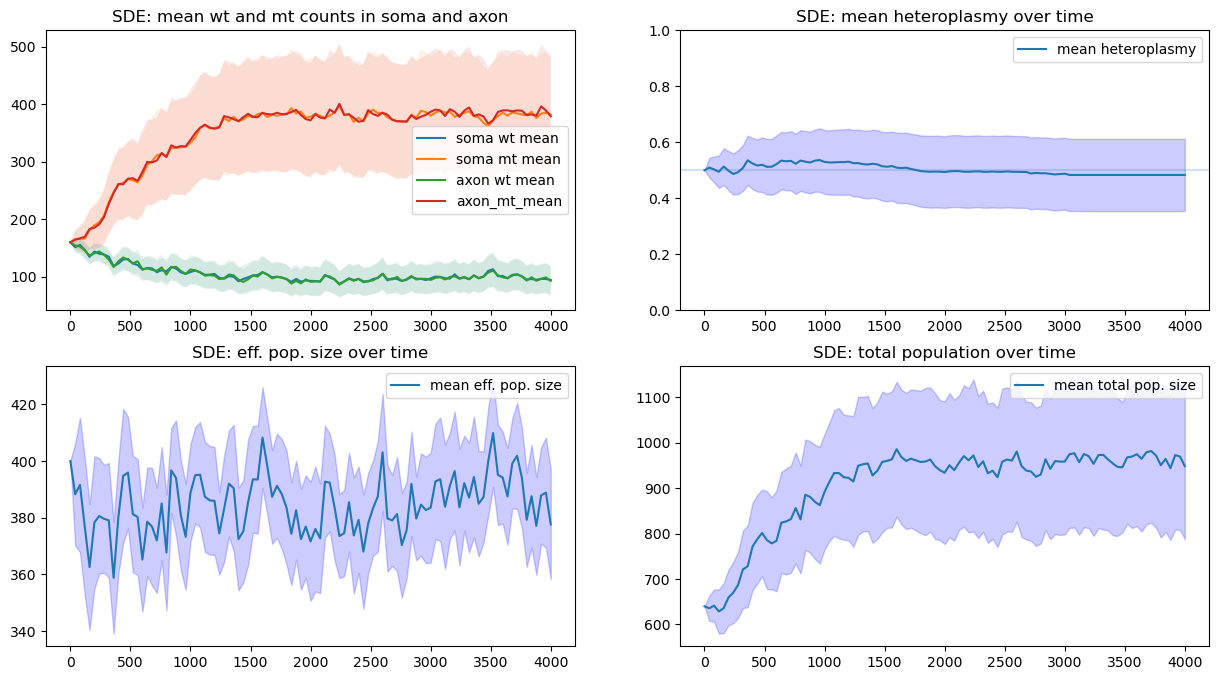

simulating using tau leaping...



100%|██████████| 60/60 [00:03<00:00, 15.29it/s]



Copy number:
wilcox. test: greater p= 0.0
pooled t test: none p= 0.0649
mk trend: increasing p= 0.0
kpss: non-stationary p= 0.01

Eff. pop. size:
wilcox. test: less p= 0.0079
pooled t test: none p= 0.0576
mk trend: increasing p= 0.0149
kpss: non-stationary p= 0.0329

Heteroplasmy:
wilcox. test: none p= 0.3017
pooled t test: none p= 0.5076
mk trend: decreasing p= 0.0
kpss: stationary p= 0.1

          t  ps_mean  ps_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       0.0   640.00    0.00    400.00     0.00    0.5000    0.000   0.0000   0.0000     0.0     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
100  4000.0  1024.08   77.19    374.31     9.36    0.5667    0.064   0.5667   0.4333     0.0      78.85     12.32     432.05     49.66      78.87     12.38     434.32     49.98



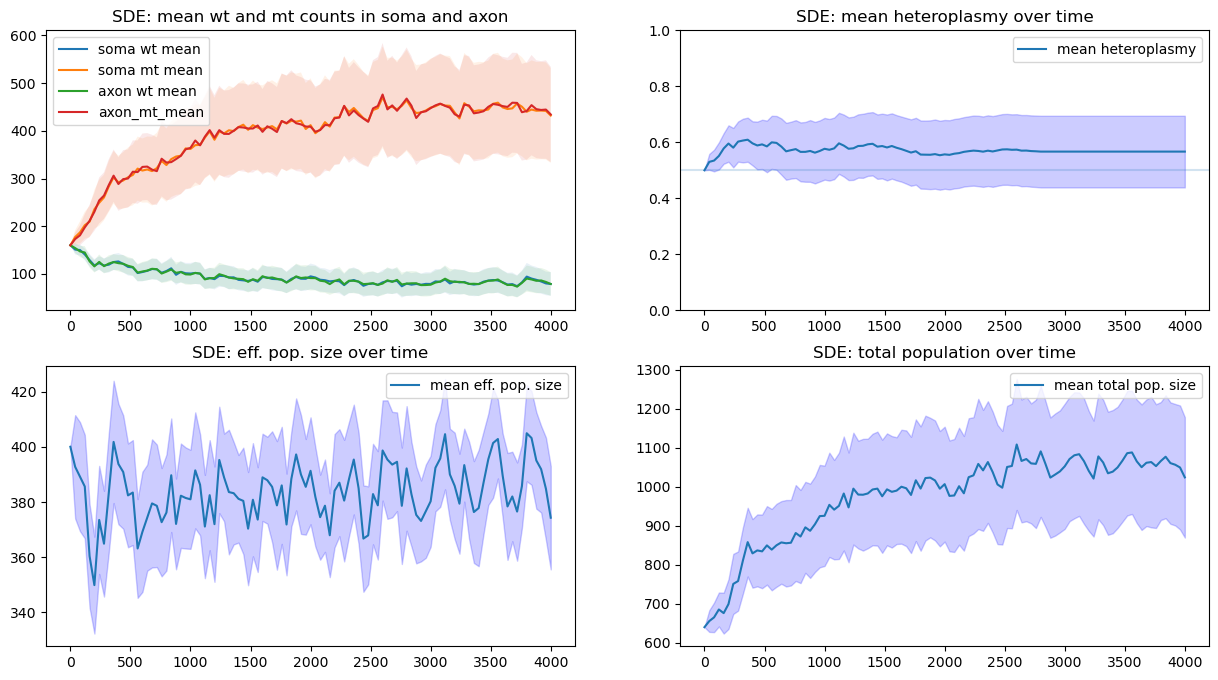


 ----- 


<<<< STARTING SIMULATION WITH C_B = 1e-05 >>>>

simulating using gillespie...



100%|██████████| 60/60 [00:03<00:00, 15.47it/s]



Copy number:
wilcox. test: none p= 0.1037
pooled t test: none p= 0.3658
mk trend: decreasing p= 0.0
kpss: non-stationary p= 0.01

Eff. pop. size:
wilcox. test: less p= 0.0
pooled t test: less p= 0.0075
mk trend: decreasing p= 0.0
kpss: non-stationary p= 0.01

Heteroplasmy:
wilcox. test: greater p= 0.0011
pooled t test: greater p= 0.0029
mk trend: increasing p= 0.0
kpss: non-stationary p= 0.01

          t  ps_mean  ps_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       0.0    640.0    0.00    400.00     0.00    0.5000   0.0000   0.0000     0.00  0.0000     160.00       0.0     160.00      0.00     160.00      0.00      160.0      0.00
100  4000.0    506.9  100.37    144.18    28.94    0.8696   0.0702   0.3333     0.05  0.6167      11.88       8.9     241.23     50.32      11.38      8.34      242.4     50.48



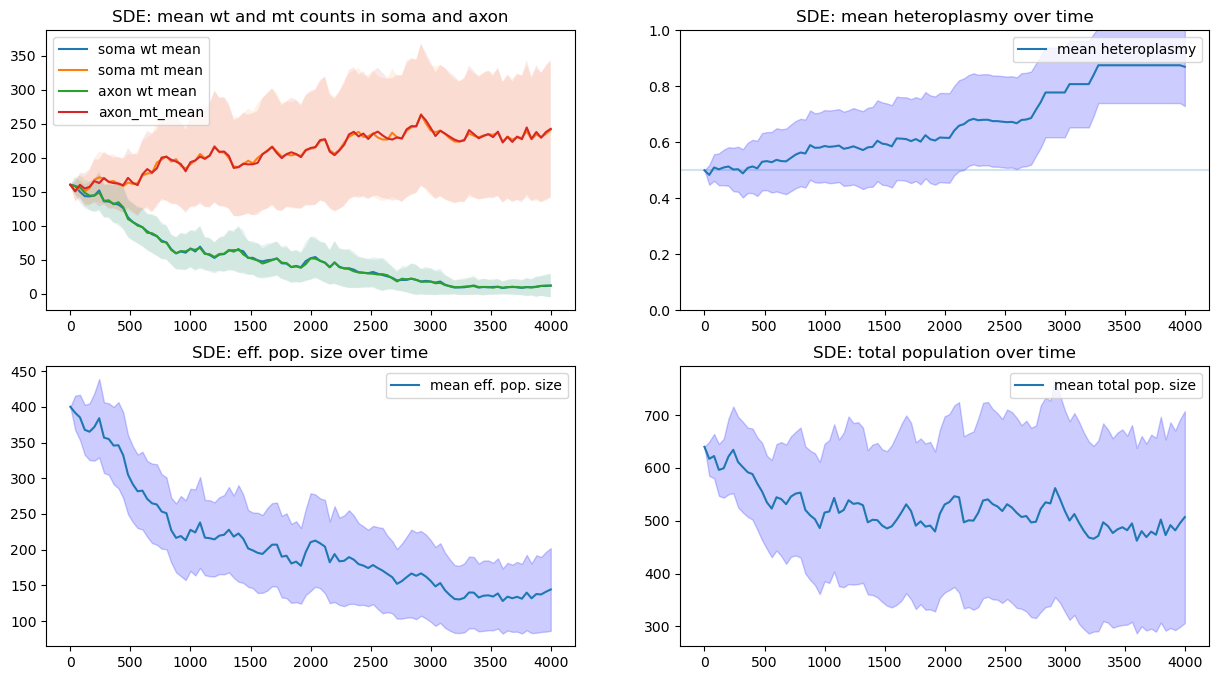

simulating using tau leaping...



100%|██████████| 60/60 [00:02<00:00, 21.52it/s]



Copy number:
wilcox. test: less p= 0.0437
pooled t test: none p= 0.2213
mk trend: decreasing p= 0.0
kpss: non-stationary p= 0.01

Eff. pop. size:
wilcox. test: less p= 0.0
pooled t test: less p= 0.0169
mk trend: decreasing p= 0.0
kpss: non-stationary p= 0.01

Heteroplasmy:
wilcox. test: greater p= 0.0163
pooled t test: none p= 0.0684
mk trend: increasing p= 0.0
kpss: non-stationary p= 0.01

          t  ps_mean  ps_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       0.0   640.00    0.00    400.00     0.00    0.5000    0.000      0.0   0.0000  0.0000     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
100  4000.0   475.05   97.72    140.25    25.81    0.7826    0.086      0.3   0.0833  0.6167      14.62      6.46     223.83     49.63      14.03      6.18     222.57     49.49



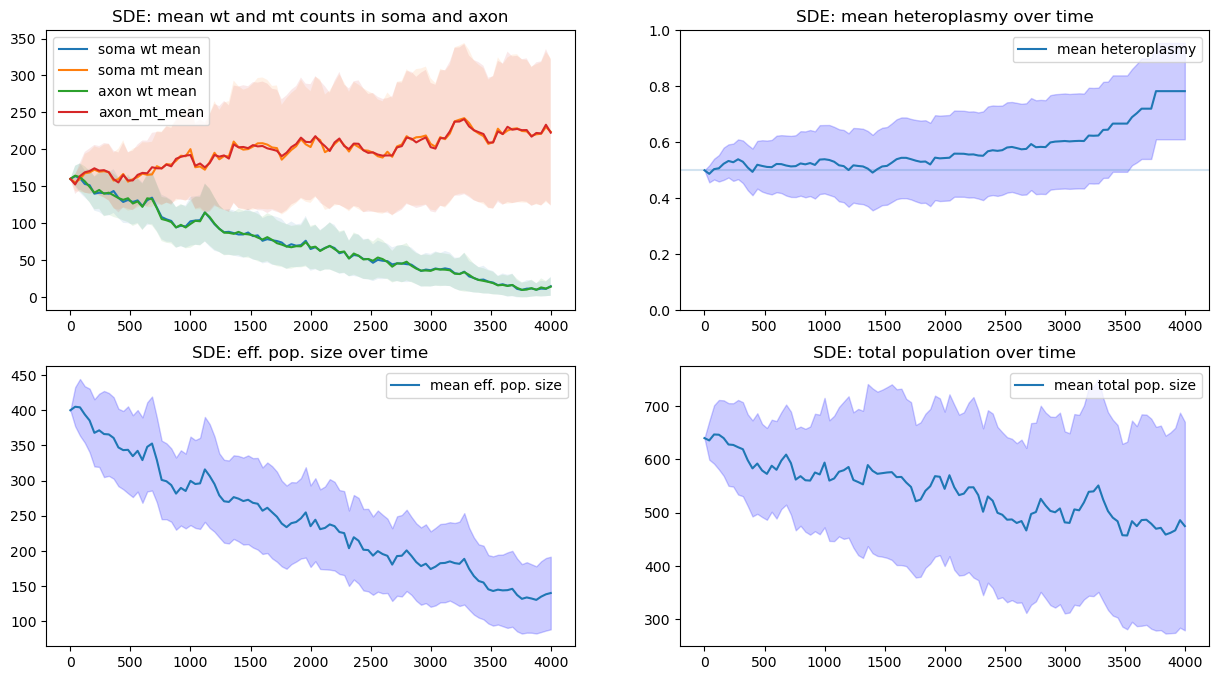


 ----- 


<<<< STARTING SIMULATION WITH C_B = 1e-06 >>>>

simulating using gillespie...



100%|██████████| 60/60 [00:04<00:00, 13.31it/s]



Copy number:
wilcox. test: less p= 0.0026
pooled t test: none p= 0.4635
mk trend: decreasing p= 0.0
kpss: stationary p= 0.1

Eff. pop. size:
wilcox. test: less p= 0.0006
pooled t test: less p= 0.0256
mk trend: decreasing p= 0.0
kpss: non-stationary p= 0.01

Heteroplasmy:
wilcox. test: none p= 0.3957
pooled t test: none p= 0.4226
mk trend: increasing p= 0.0
kpss: non-stationary p= 0.01

          t  ps_mean  ps_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       0.0   640.00    0.00    400.00     0.00       0.5    0.000     0.00   0.0000  0.0000     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
100  4000.0   537.93  130.68    221.46    47.97       0.6    0.098     0.25   0.1667  0.5833      57.82     20.12     210.43     65.37      58.15     20.43     211.53     65.33



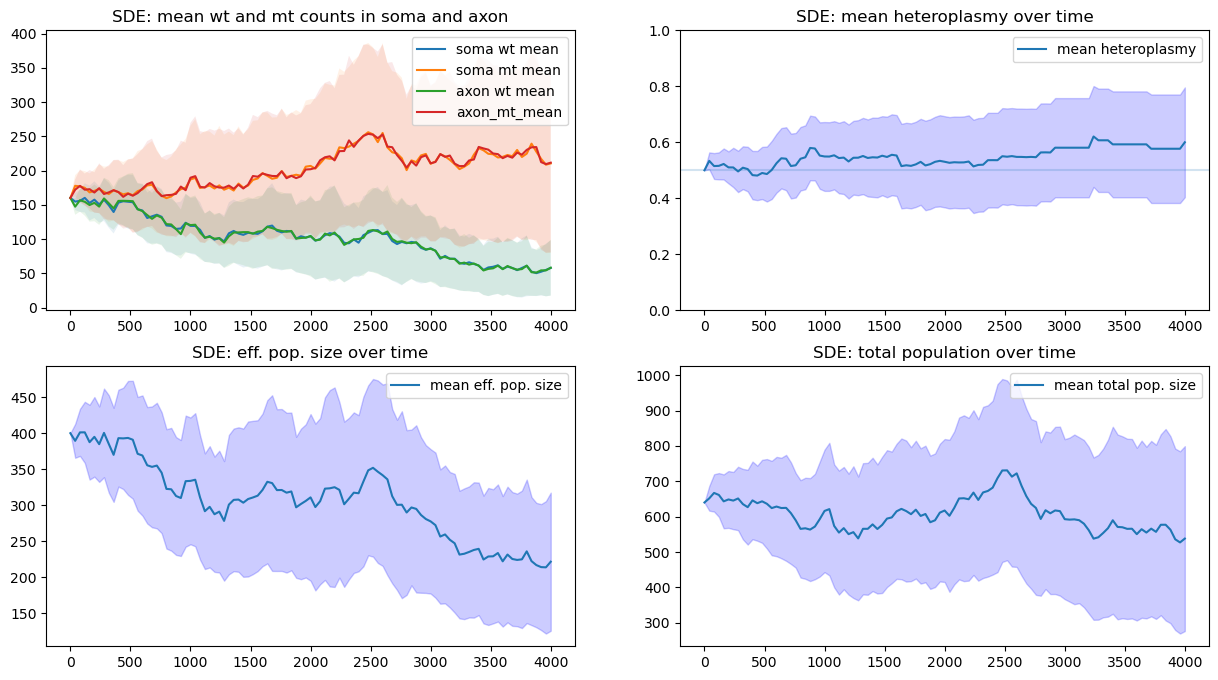

simulating using tau leaping...



100%|██████████| 60/60 [00:02<00:00, 27.26it/s]



Copy number:
wilcox. test: less p= 0.0
pooled t test: less p= 0.0258
mk trend: decreasing p= 0.0
kpss: non-stationary p= 0.01

Eff. pop. size:
wilcox. test: less p= 0.0
pooled t test: less p= 0.0127
mk trend: decreasing p= 0.0
kpss: non-stationary p= 0.01

Heteroplasmy:
wilcox. test: none p= 1.0
pooled t test: none p= 0.4226
mk trend: no trend p= 0.9415
kpss: stationary p= 0.1

          t  ps_mean  ps_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       0.0   640.00    0.00     400.0     0.00     0.500   0.0000      0.0      0.0  0.0000      160.0      0.00     160.00      0.00     160.00      0.00     160.00      0.00
100  4000.0   193.27   65.59      77.8    24.04     0.479   0.1348      0.1      0.1  0.7833       19.2      9.09      78.33     32.62      20.12      9.53      75.62     30.99



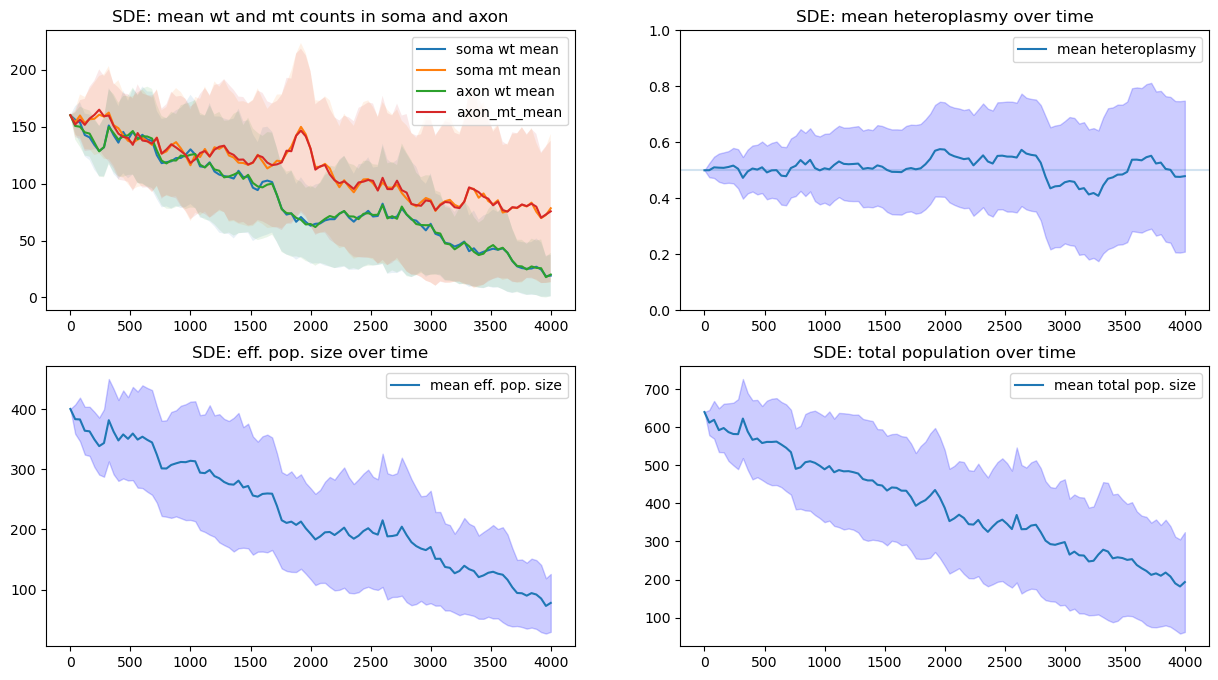


 ----- 


<<<< STARTING SIMULATION WITH C_B = 1e-07 >>>>

simulating using gillespie...



100%|██████████| 60/60 [00:04<00:00, 14.87it/s]



Copy number:
wilcox. test: less p= 0.0002
pooled t test: none p= 0.0942
mk trend: decreasing p= 0.0
kpss: non-stationary p= 0.01

Eff. pop. size:
wilcox. test: less p= 0.0
pooled t test: none p= 0.0675
mk trend: decreasing p= 0.0
kpss: non-stationary p= 0.01

Heteroplasmy:
wilcox. test: none p= 1.0
pooled t test: none p= 1.0
mk trend: decreasing p= 0.0161
kpss: non-stationary p= 0.042

          t  ps_mean  ps_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       0.0   640.00    0.00     400.0     0.00       0.5   0.0000     0.00     0.00     0.0     160.00      0.00     160.00      0.00      160.0      0.00      160.0      0.00
100  4000.0   389.05  104.05     253.1    87.11       0.5   0.1179     0.15     0.15     0.7     103.28     43.02      90.67     33.36      104.5     44.34       90.6     33.45



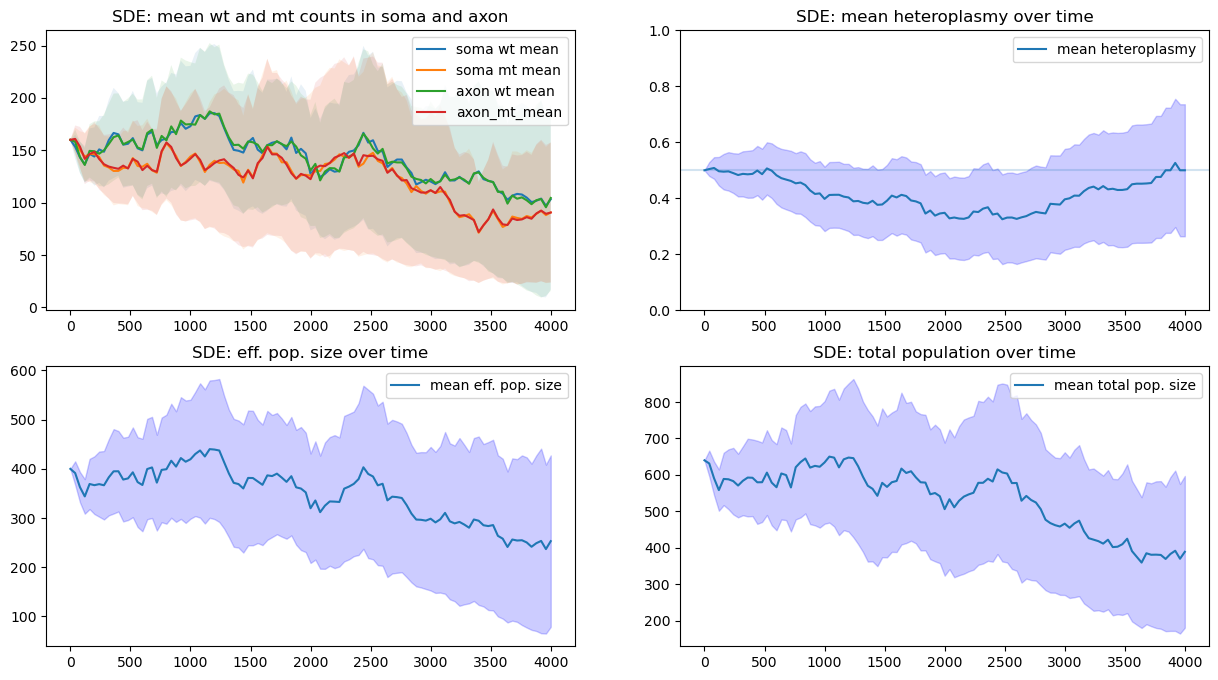

simulating using tau leaping...



100%|██████████| 60/60 [00:02<00:00, 22.51it/s]



Copy number:
wilcox. test: none p= 0.0731
pooled t test: none p= 0.2992
mk trend: increasing p= 0.0001
kpss: non-stationary p= 0.0282

Eff. pop. size:
wilcox. test: less p= 0.03
pooled t test: none p= 0.9195
mk trend: increasing p= 0.0206
kpss: non-stationary p= 0.0406

Heteroplasmy:
wilcox. test: none p= 0.4908
pooled t test: none p= 0.6945
mk trend: no trend p= 0.7314
kpss: stationary p= 0.0703

          t  ps_mean  ps_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       0.0   640.00    0.00     400.0     0.00    0.5000   0.0000   0.0000     0.00     0.0     160.00      0.00      160.0      0.00     160.00      0.00     160.00      0.00
100  4000.0   688.78  154.48     392.7   100.57    0.5546   0.0992   0.2167     0.15     0.6     145.22     48.75      197.2     64.93     148.78     50.09     197.58     65.08



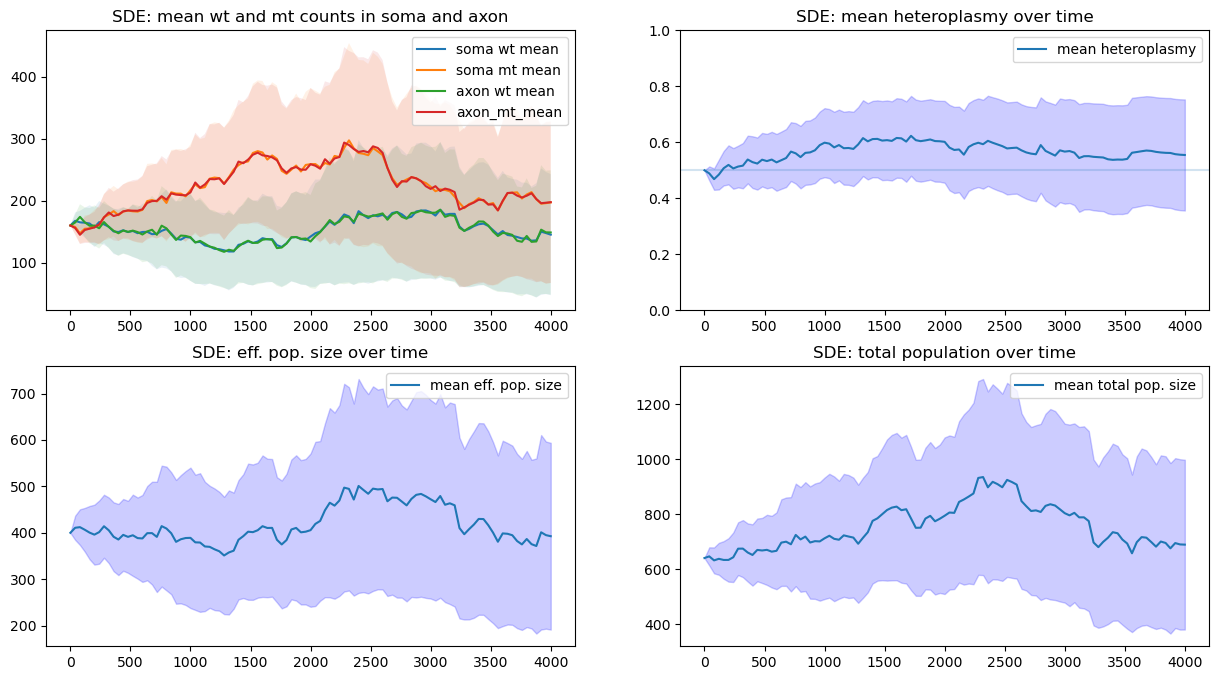


 ----- 


<<<< STARTING SIMULATION WITH C_B = 1e-08 >>>>

simulating using gillespie...



100%|██████████| 60/60 [00:04<00:00, 12.37it/s]



Copy number:
wilcox. test: less p= 0.0078
pooled t test: none p= 0.2773
mk trend: decreasing p= 0.0
kpss: non-stationary p= 0.01

Eff. pop. size:
wilcox. test: less p= 0.0008
pooled t test: none p= 0.7512
mk trend: decreasing p= 0.0
kpss: non-stationary p= 0.01

Heteroplasmy:
wilcox. test: none p= 0.1297
pooled t test: none p= 0.0502
mk trend: decreasing p= 0.0
kpss: non-stationary p= 0.01

          t  ps_mean  ps_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       0.0   640.00    0.00    400.00     0.00    0.5000   0.0000   0.0000      0.0     0.0     160.00      0.00     160.00       0.0     160.00      0.00     160.00      0.00
100  4000.0   525.95  146.44    363.02   101.62    0.2974   0.1044   0.0833      0.2     0.7     154.53     49.97     108.52      57.1     154.18     49.22     108.72     56.25



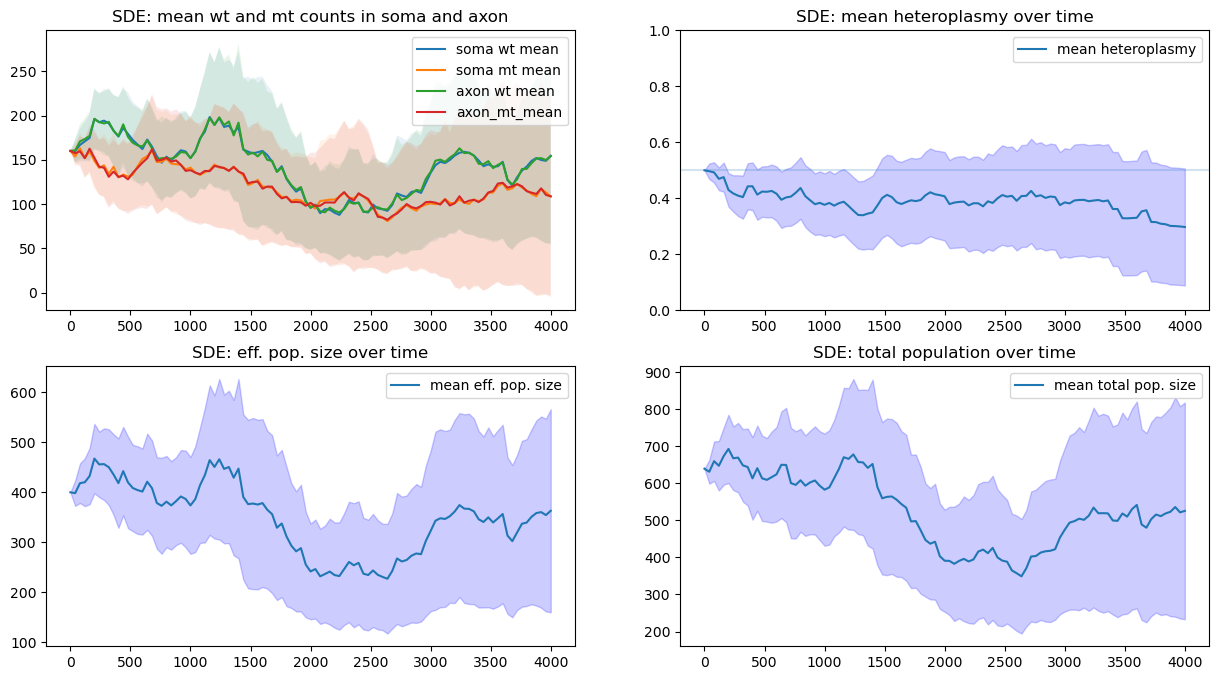

simulating using tau leaping...



100%|██████████| 60/60 [00:02<00:00, 24.93it/s]



Copy number:
wilcox. test: less p= 0.0029
pooled t test: none p= 0.2146
mk trend: decreasing p= 0.0
kpss: non-stationary p= 0.01

Eff. pop. size:
wilcox. test: less p= 0.0006
pooled t test: none p= 0.8262
mk trend: decreasing p= 0.0
kpss: non-stationary p= 0.0264

Heteroplasmy:
wilcox. test: none p= 0.6705
pooled t test: none p= 0.8802
mk trend: decreasing p= 0.0047
kpss: non-stationary p= 0.0245

          t  ps_mean  ps_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       0.0    640.0    0.00     400.0     0.00    0.5000   0.0000   0.0000     0.00     0.0     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
100  4000.0    500.2  138.45     363.5   125.35    0.4607   0.1123   0.1167     0.15     0.7     161.08     63.55      91.35     34.87     156.85     62.07      90.92     34.96



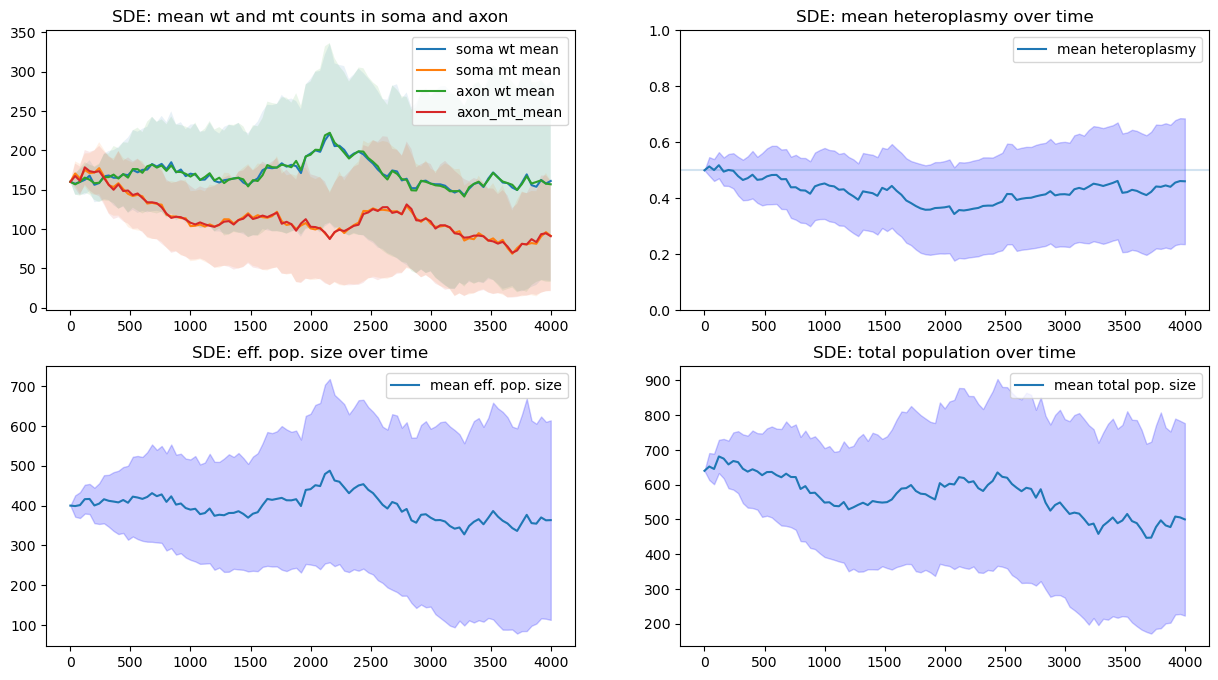


 ----- 


<<<< STARTING SIMULATION WITH C_B = 1e-09 >>>>

simulating using gillespie...



100%|██████████| 60/60 [00:06<00:00,  9.62it/s]



Copy number:
wilcox. test: greater p= 0.0016
pooled t test: none p= 0.9214
mk trend: decreasing p= 0.0301
kpss: non-stationary p= 0.0427

Eff. pop. size:
wilcox. test: greater p= 0.0023
pooled t test: none p= 0.685
mk trend: increasing p= 0.0
kpss: non-stationary p= 0.0431

Heteroplasmy:
wilcox. test: none p= 0.0739
pooled t test: none p= 0.1737
mk trend: decreasing p= 0.0
kpss: non-stationary p= 0.01

          t  ps_mean  ps_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       0.0    640.0    0.00    400.00     0.00    0.5000   0.0000     0.00   0.0000  0.0000     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
100  4000.0    664.4  250.19    509.09   221.61    0.2671   0.1009     0.05   0.1667  0.7333     231.97    110.36     104.55     50.45     225.35    106.59     102.53     48.62



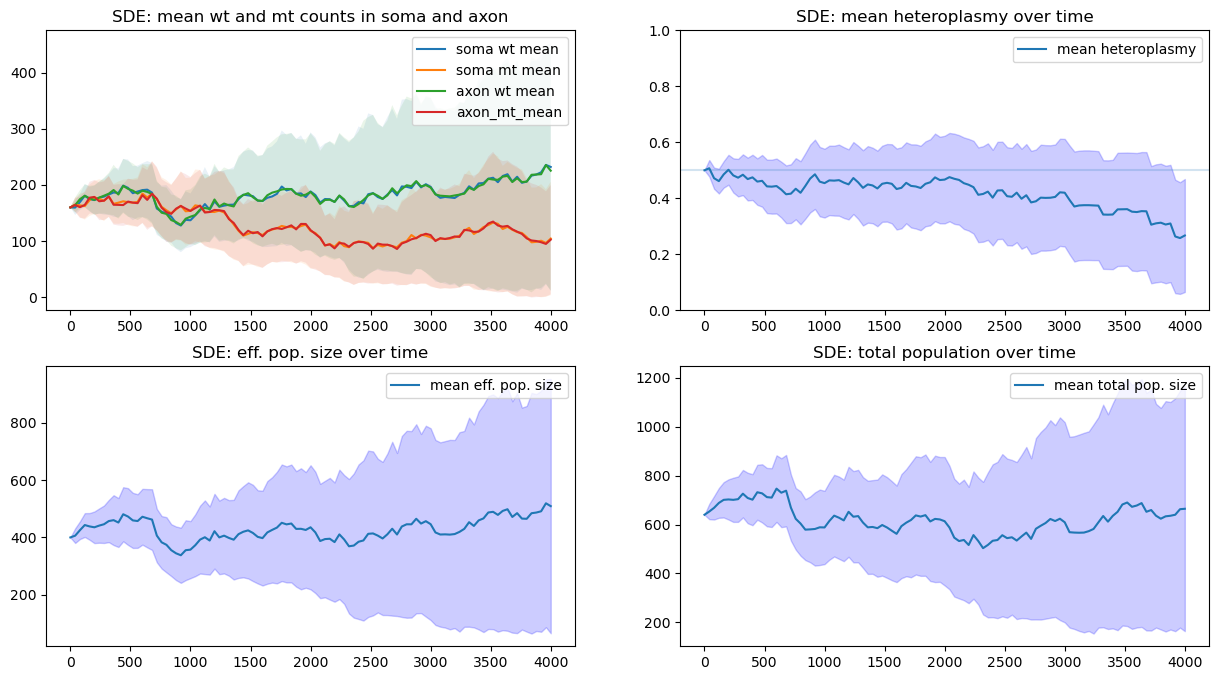

simulating using tau leaping...



100%|██████████| 60/60 [00:02<00:00, 24.28it/s]



Copy number:
wilcox. test: less p= 0.0123
pooled t test: none p= 0.4241
mk trend: no trend p= 0.3661
kpss: stationary p= 0.0924

Eff. pop. size:
wilcox. test: less p= 0.0045
pooled t test: none p= 0.6649
mk trend: decreasing p= 0.0297
kpss: stationary p= 0.0744

Heteroplasmy:
wilcox. test: none p= 0.8553
pooled t test: none p= 0.7343
mk trend: increasing p= 0.0
kpss: non-stationary p= 0.01

          t  ps_mean  ps_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       0.0   640.00    0.00     400.0     0.00    0.5000   0.0000      0.0   0.0000     0.0     160.00      0.00     160.00      0.00      160.0      0.00     160.00      0.00
100  4000.0   570.73  126.32     341.9    94.48    0.5414   0.1017      0.2   0.1833     0.6     133.72     47.96     152.35     49.02      131.9     46.95     152.77     49.25



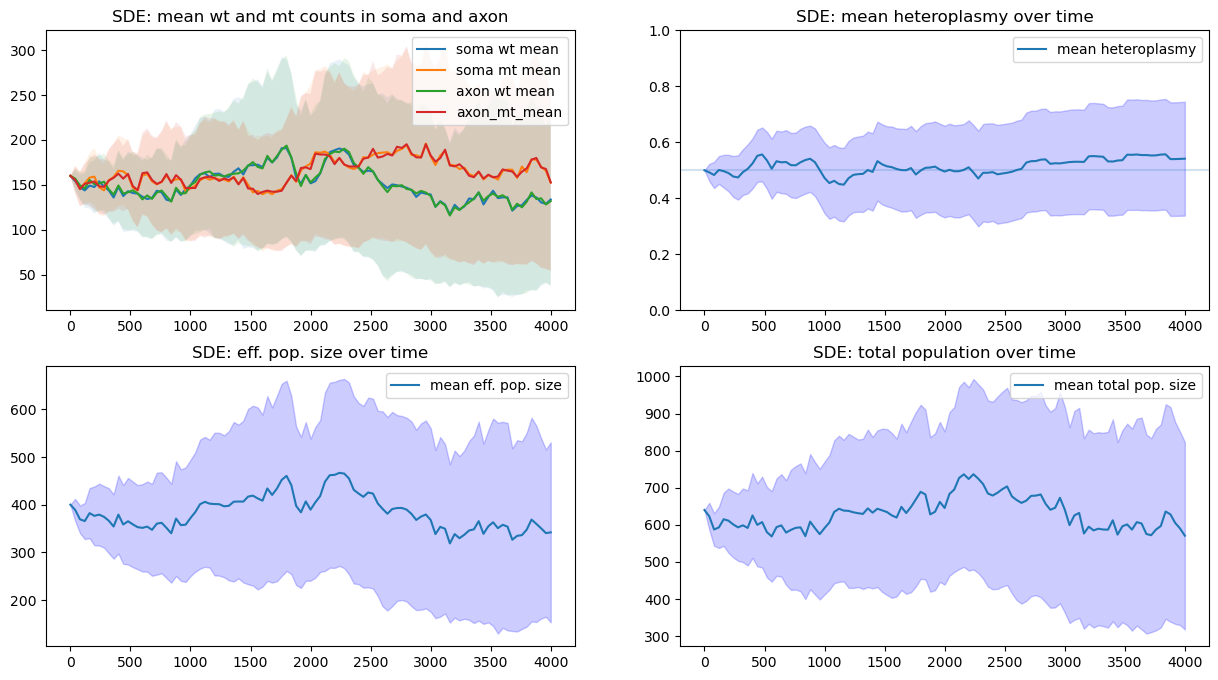


 ----- 


<<<< STARTING SIMULATION WITH C_B = 1e-10 >>>>

simulating using gillespie...



100%|██████████| 60/60 [00:04<00:00, 13.13it/s]



Copy number:
wilcox. test: less p= 0.0025
pooled t test: less p= 0.0005
mk trend: decreasing p= 0.0
kpss: stationary p= 0.0556

Eff. pop. size:
wilcox. test: greater p= 0.0001
pooled t test: none p= 0.7565
mk trend: increasing p= 0.0066
kpss: stationary p= 0.0653

Heteroplasmy:
wilcox. test: none p= 0.2726
pooled t test: less p= 0.0497
mk trend: decreasing p= 0.0
kpss: non-stationary p= 0.01

          t  ps_mean  ps_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       0.0   640.00    0.00    400.00     0.00    0.5000      0.0   0.0000   0.0000  0.0000      160.0      0.00     160.00      0.00     160.00      0.00      160.0      0.00
100  4000.0   546.27  165.09    420.09   157.79    0.3835      0.1   0.1333   0.2333  0.6167      190.5     79.54      82.73     30.45     187.53     78.84       85.5     31.61



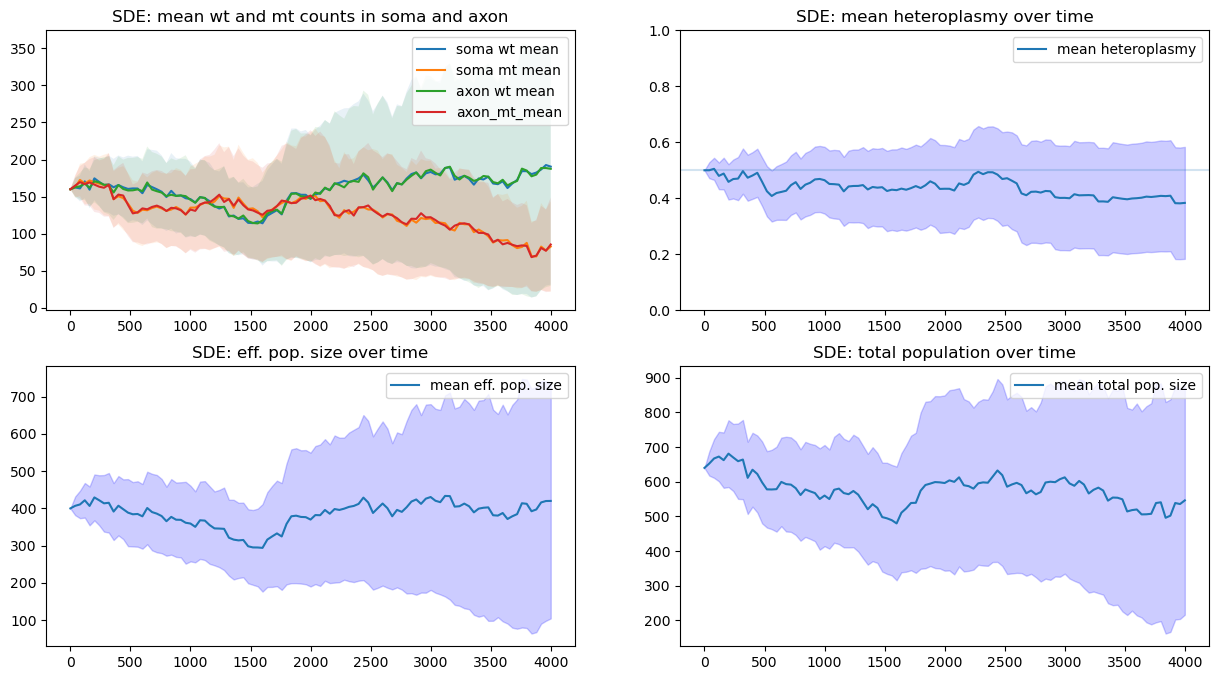

simulating using tau leaping...



100%|██████████| 60/60 [00:03<00:00, 19.68it/s]



Copy number:
wilcox. test: less p= 0.0009
pooled t test: none p= 0.1401
mk trend: decreasing p= 0.0
kpss: non-stationary p= 0.01

Eff. pop. size:
wilcox. test: less p= 0.0
pooled t test: less p= 0.0005
mk trend: decreasing p= 0.0
kpss: non-stationary p= 0.01

Heteroplasmy:
wilcox. test: none p= 0.0637
pooled t test: none p= 0.1198
mk trend: increasing p= 0.0
kpss: non-stationary p= 0.01

          t  ps_mean  ps_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       0.0   640.00    0.00     400.0     0.00    0.5000   0.0000   0.0000   0.0000  0.0000     160.00      0.00      160.0      0.00     160.00      0.00      160.0      0.00
100  4000.0   475.85  143.64     194.9    54.74    0.7311   0.0961   0.2333   0.0833  0.6667      50.67     21.46      189.8     69.56      50.58     21.47      184.8     67.88



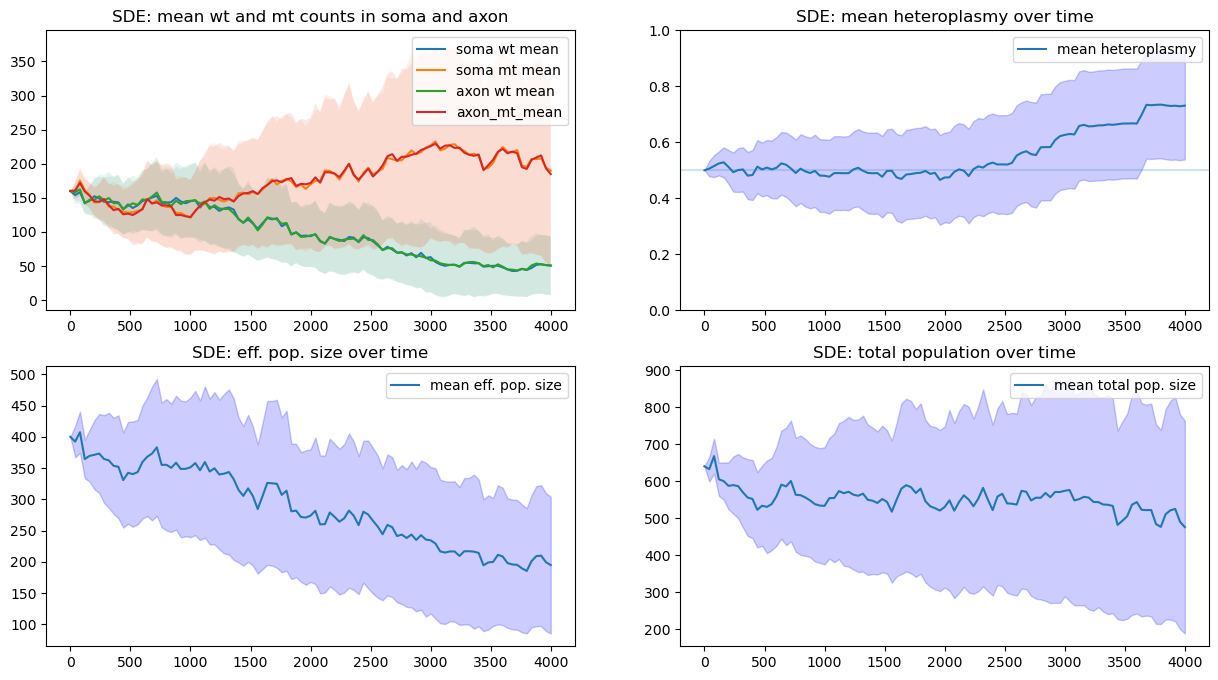


 ----- 


<<<< STARTING SIMULATION WITH C_B = 1e-11 >>>>

simulating using gillespie...



100%|██████████| 60/60 [00:04<00:00, 12.84it/s]



Copy number:
wilcox. test: less p= 0.0006
pooled t test: none p= 0.2158
mk trend: decreasing p= 0.0
kpss: non-stationary p= 0.01

Eff. pop. size:
wilcox. test: less p= 0.0
pooled t test: none p= 0.1007
mk trend: decreasing p= 0.0
kpss: non-stationary p= 0.01

Heteroplasmy:
wilcox. test: none p= 1.0
pooled t test: none p= 0.8399
mk trend: no trend p= 0.5534
kpss: stationary p= 0.1

          t  ps_mean  ps_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       0.0   640.00    0.00    400.00     0.00       0.5    0.000   0.0000   0.0000  0.0000     160.00      0.00      160.0      0.00      160.0      0.00     160.00      0.00
100  4000.0   451.57  147.78    269.18    99.69       0.5    0.125   0.1333   0.1333  0.7333     104.78     48.77      122.5     59.97      103.6     48.63     120.68     58.55



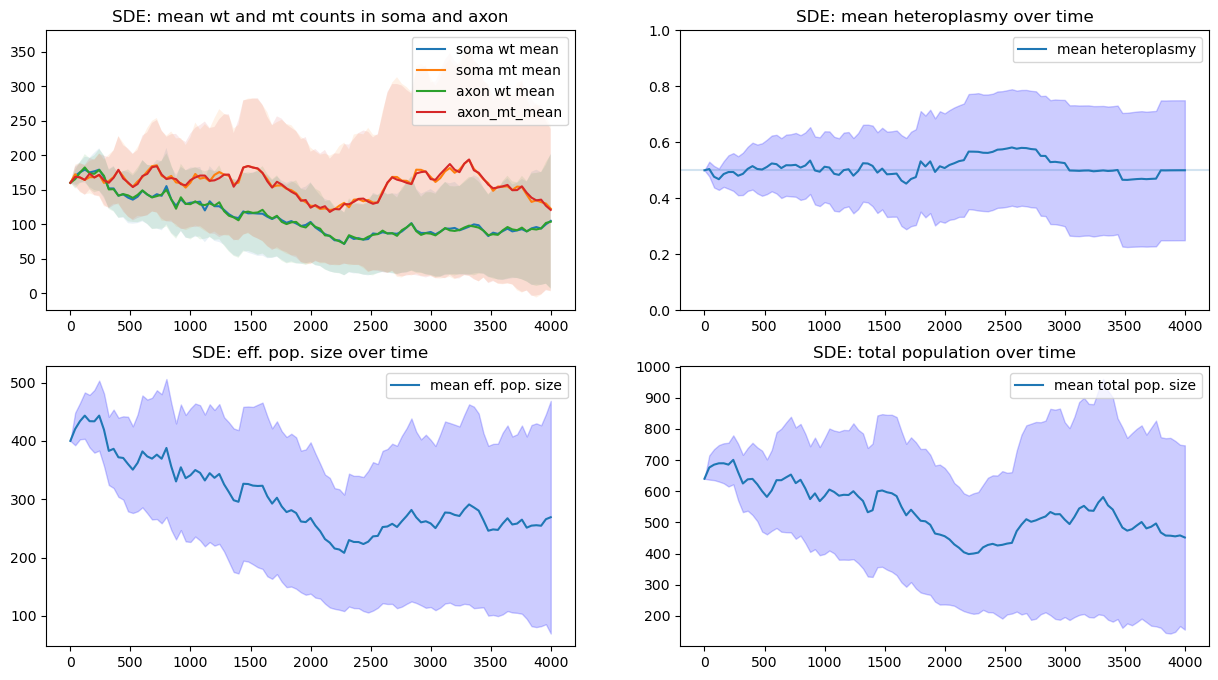

simulating using tau leaping...



100%|██████████| 60/60 [00:02<00:00, 20.13it/s]



Copy number:
wilcox. test: none p= 0.7172
pooled t test: greater p= 0.0361
mk trend: increasing p= 0.0
kpss: non-stationary p= 0.01

Eff. pop. size:
wilcox. test: none p= 0.1495
pooled t test: greater p= 0.0114
mk trend: increasing p= 0.0
kpss: non-stationary p= 0.01

Heteroplasmy:
wilcox. test: none p= 0.874
pooled t test: none p= 0.7418
mk trend: no trend p= 0.5659
kpss: stationary p= 0.1

          t  ps_mean  ps_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       0.0   640.00    0.00     400.0     0.00      0.50   0.0000      0.0   0.0000  0.0000     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
100  4000.0  1130.83  242.94     690.8   185.48      0.48   0.0999      0.2   0.2167  0.5833     273.95     93.62     291.37     92.35     270.17     93.19     295.35     94.17



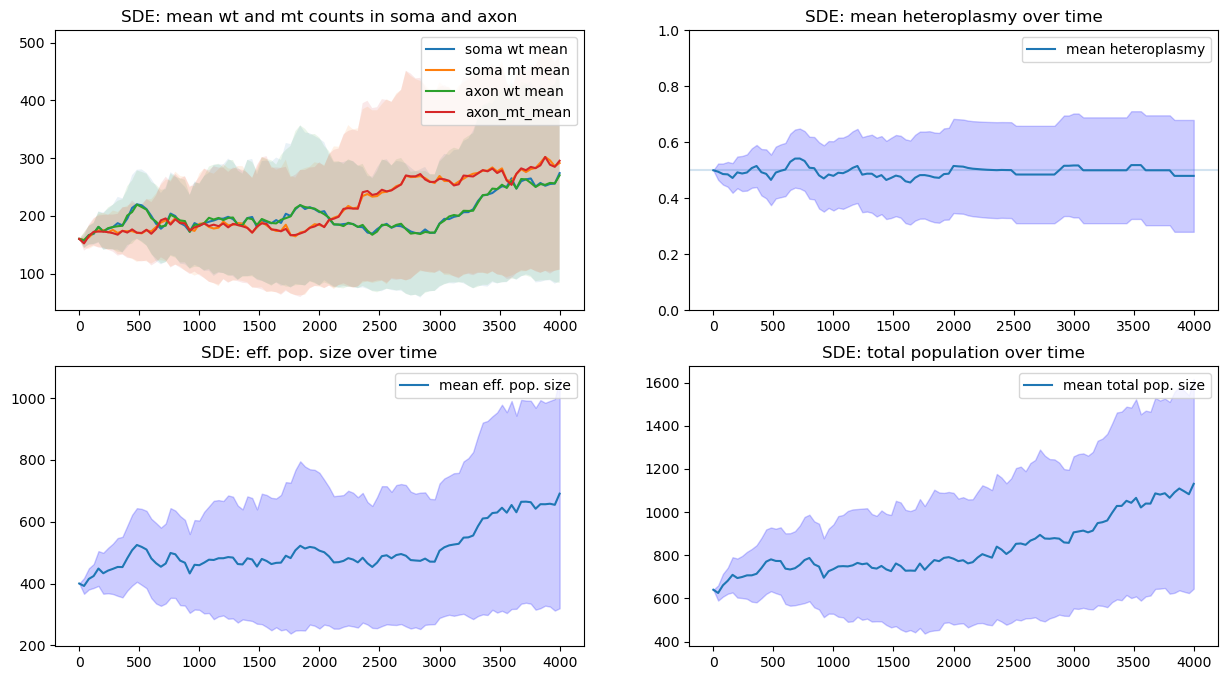


 ----- 

   cn_w_test_dir  cn_w_test_p cn_t_test_dir  cn_t_test_p cn_mk_trend  cn_mk_p   cn_kpss_trend  cn_kpss_p eps_w_test_dir  eps_w_test_p  ... het_w_test_dir  het_w_test_p het_t_test_dir  het_t_test_p het_mk_trend  het_mk_p  het_kpss_trend  het_kpss_p simtype            cb
0        greater       0.0000       greater       0.0004  increasing   0.0000  non-stationary     0.0100           none        0.8834  ...        greater        0.0000        greater        0.0012   increasing    0.0000  non-stationary      0.0100       g  1.000000e-01
1        greater       0.0000       greater       0.0037  increasing   0.0000  non-stationary     0.0100           none        0.7097  ...        greater        0.0000        greater        0.0102   increasing    0.0000  non-stationary      0.0100       t  1.000000e-01
2        greater       0.0000       greater       0.0025  increasing   0.0000  non-stationary     0.0100           none        0.6751  ...        greater        0.0000        great

In [16]:
TIME_POINTS = np.linspace(0, 4000, 101)
REP = 60



stats_df = pd.DataFrame()

for c_b in C_B_val:
    print(f"\n<<<< STARTING SIMULATION WITH C_B = {c_b} >>>>\n")
    
    for node, data in G.nodes(data = True):
        if data['nodetype'] == 1:
            data['c_b'] = c_b

#     # infer the ode model
#     ode_model = ode_from_network(G, prnt=True)

#     # run the ode model
#     ode_results = simulate_ode(ode_model, TIME_POINTS, START_STATE)
#     plot_ode_results(ode_results, TIME_POINTS, DELTA, VARS, NODES, prnt=False)

    # infer the parameterse of the sde systems
    SDE_PARAM = sde_param_from_network(G, prnt=False)

    # run the gillespie simulation
    gillespie_results = simulate_gillespie(SDE_PARAM, TIME_POINTS, START_STATE, replicates=REP)
    df_g, stats_g = two_component_statistics(gillespie_results, TIME_POINTS, DELTA)
    
    stats_g['simtype'] = 'g'
    stats_g['cb'] = c_b
    stats_df = stats_df.append(pd.Series(stats_g), ignore_index=True)
    
    print(df_g.iloc[[0, -1]]);print()
    plot_twocomponent_results(df_g)
    
    
    # run the tau leaping simulation
    tauleaping_results = simulate_tauleaping(SDE_PARAM, TIME_POINTS, START_STATE, replicates=REP, timestep=0.005)
    df_t, stats_t = two_component_statistics(tauleaping_results, TIME_POINTS, DELTA)
    
    stats_t['simtype'] = 't'
    stats_t['cb'] = c_b
    stats_df = stats_df.append(pd.Series(stats_t), ignore_index=True)
    
    print(df_t.iloc[[0, -1]]);print()
    plot_twocomponent_results(df_t)
    
    print("\n ----- \n")
    
print(stats_df)